<a href="https://colab.research.google.com/github/mimahb/user-task-completion-likelihood/blob/main/usertaskcompletionlikelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   UserID CourseCategory  TimeSpentOnCourse  ...  CompletionRate  DeviceType  CourseCompletion
0    5618         Health          29.979719  ...       20.860773           1                 0
1    4326           Arts          27.802640  ...       65.632415           1                 0
2    5849           Arts          86.820485  ...       63.812007           1                 1
3    4992        Science          35.038427  ...       95.433162           0                 1
4    3866    Programming          92.490647  ...       18.102478           0                 0

[5 rows x 9 columns]

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   Numbe

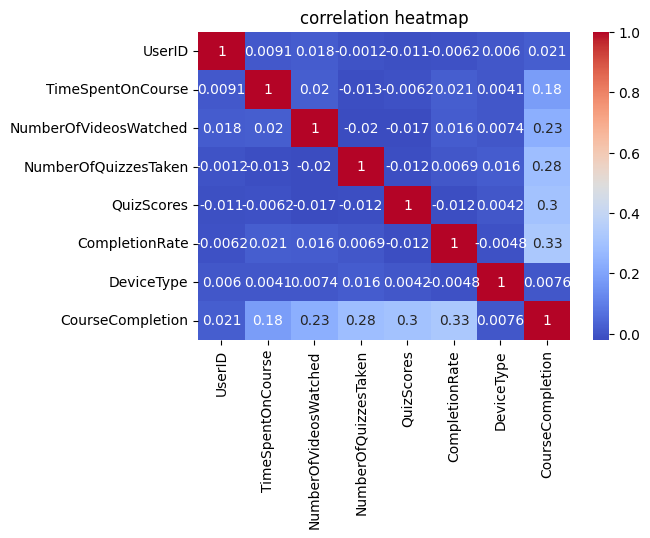

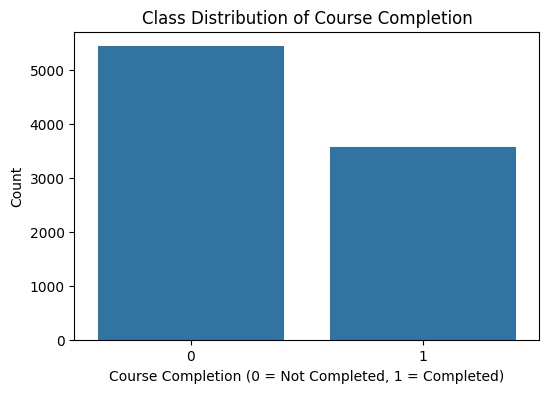

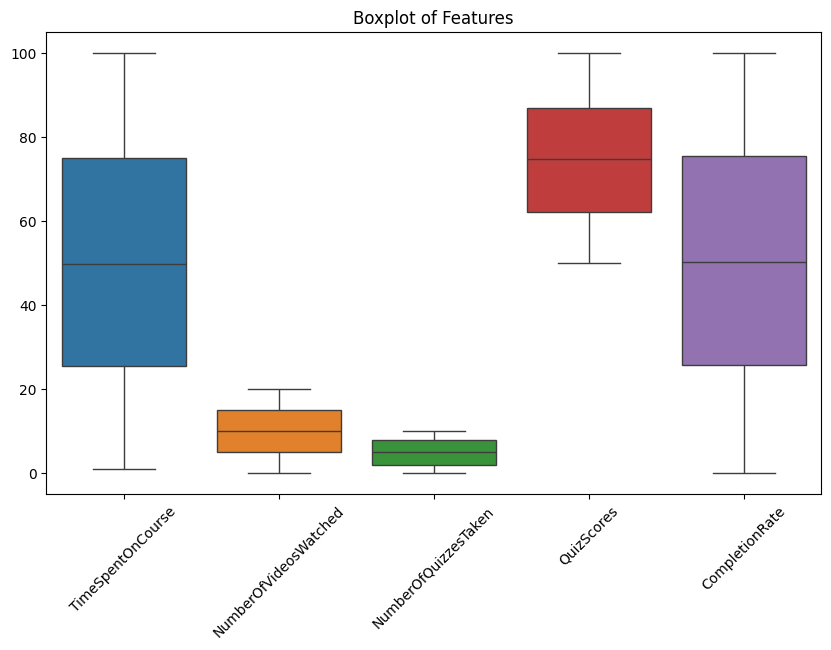

Decision tree accuracy: 0.82
Decision tree precision: 0.81
Decision tree recall: 0.73

Sample User Predictions:
User 1: Completed
User 2: Not Completed
User 3: Completed
User 4: Completed
User 5: Completed


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv('online_course_engagement_data.csv')
print("Dataset Preview:")
print(data.head())

print('\nDataset info:')
print(data.info())

print('\nDataset describtion:')
print(data.describe())

print('\nMissing Data:')
print(data.isna().sum())

#correlation between the features and the target value
numerical_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(6, 4))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

#distribution of the target value
plt.figure(figsize=(6, 4))
sns.countplot(x=data['CourseCompletion'])
plt.xlabel('Course Completion (0 = Not Completed, 1 = Completed)')
plt.ylabel('Count')
plt.title('Class Distribution of Course Completion')
plt.show()

#check for outliers
features = data.drop(['UserID', 'CourseCompletion', 'DeviceType'], axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.xticks(rotation=45)
plt.title('Boxplot of Features')
plt.show()

#data preprocessing
#drop any missing data
data = data.dropna()

#split dataset into features x and target y
x = data[['TimeSpentOnCourse', 'UserID', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'CompletionRate', 'DeviceType']]
y = data['CourseCompletion']

#split into training and testing 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#feature scaling using standard scaler
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#build model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

#make predictions
prediction = model.predict(x_test)

#evaluate predictions
accuracy = accuracy_score(y_test, prediction)
print(f"Decision tree accuracy: {accuracy:.2f}")

precision = precision_score(y_test, prediction)
print(f"Decision tree precision: {precision:.2f}")

recall = recall_score(y_test, prediction)
print(f"Decision tree recall: {recall:.2f}")

#predictions for sample user inputs
sample_users = x_test[:5]  # Taking 5 random samples
predictions = model.predict(sample_users)

print("\nSample User Predictions:")
for i, pred in enumerate(predictions):
    print(f"User {i+1}: {'Completed' if pred == 1 else 'Not Completed'}")




